In [6]:
import cobra
from cobra.io import read_sbml_model
from cobra.io import load_json_model
import pandas as pd
import matplotlib.pyplot as plt
from reframed.io.sbml import load_cbmodel

In [17]:
pip install troppo

Note: you may need to restart the kernel to use updated packages.


In [18]:
import troppo

# getting to grips with mewpy again

In [4]:
from mewpy.simulation import solvers
solvers

['gurobi', 'cplex']

In [5]:
from mewpy.simulation import set_default_solver
set_default_solver('cplex')

In [101]:
model = load_cbmodel('Human-GEM-annotated.xml',flavor='cobra')
model

R_HMR_3905: M_m01796c + M_m02552c --> M_m01249c + M_m02039c + M_m02553c
R_HMR_3907: M_m01796c + M_m02554c --> M_m01249c + M_m02039c + M_m02555c
R_HMR_4097: M_m01252c + M_m01371c + M_m01597c --> M_m01261c + M_m01334c + M_m02759c
R_HMR_4099: M_m01252m + M_m01371m + M_m01597m --> M_m01261m + M_m01334m + M_m02759m
R_HMR_4108: M_m01257c + M_m01597c --> M_m01261c + M_m01334c + M_m02039c
R_HMR_4133: M_m01252c + M_m01371c + M_m02039c --> M_m01257c + M_m02759c
R_HMR_4137: M_m01597m + M_m02552m + M_m02819m --> M_m01261m + M_m01596m + M_m02553m
R_HMR_4281: M_m02039p + M_m02553p + M_m02819p <-> M_m02403p + M_m02552p
R_HMR_4388: M_m02039c + M_m02553c + M_m02819c <-> M_m02403c + M_m02552c
R_HMR_4283: M_m01249c + M_m02040c + M_m02554c --> M_m01252c + 2.0 M_m02039c + M_m02555c
R_HMR_8357: M_m01249m + M_m02040m + M_m02552m --> M_m01252m + 2.0 M_m02039m + M_m02553m
R_HMR_4379: M_m01371c + M_m01845c --> M_m01285c + M_m01841c + M_m02039c
R_HMR_4301: M_m01845c + M_m03130c --> M_m01841c + M_m02039c + M_m031

In [30]:
from mewpy.simulation import get_simulator
simul = get_simulator(model)

In [9]:
simul.get_uptake_reactions()

['R_HMR_7108',
 'R_HMR_7110',
 'R_HMR_7112',
 'R_HMR_7114',
 'R_HMR_7116',
 'R_HMR_7118',
 'R_HMR_7120',
 'R_HMR_7122',
 'R_HMR_7124',
 'R_HMR_7126',
 'R_HMR_9023',
 'R_HMR_9024',
 'R_HMR_9032',
 'R_HMR_9808',
 'R_HMR_9809',
 'R_HMR_9810',
 'R_HMR_9811',
 'R_HMR_9812',
 'R_HMR_9813',
 'R_HMR_9814',
 'R_HMR_9815',
 'R_HMR_9816',
 'R_HMR_9033',
 'R_HMR_9034',
 'R_HMR_9035',
 'R_HMR_9036',
 'R_HMR_9037',
 'R_HMR_9038',
 'R_HMR_9039',
 'R_HMR_9040',
 'R_HMR_9041',
 'R_HMR_9042',
 'R_HMR_9043',
 'R_HMR_9044',
 'R_HMR_9045',
 'R_HMR_9046',
 'R_HMR_9047',
 'R_HMR_9048',
 'R_HMR_9049',
 'R_HMR_9050',
 'R_HMR_9051',
 'R_HMR_9052',
 'R_HMR_9053',
 'R_HMR_9054',
 'R_HMR_9055',
 'R_HMR_9056',
 'R_HMR_9058',
 'R_HMR_9061',
 'R_HMR_9062',
 'R_HMR_9063',
 'R_HMR_9064',
 'R_HMR_9065',
 'R_HMR_9066',
 'R_HMR_9067',
 'R_HMR_9068',
 'R_HMR_9069',
 'R_HMR_9070',
 'R_HMR_9071',
 'R_HMR_9072',
 'R_HMR_9073',
 'R_HMR_9074',
 'R_HMR_9075',
 'R_HMR_9076',
 'R_HMR_9077',
 'R_HMR_9078',
 'R_HMR_9079',
 'R_HMR_90

In [108]:
result = simul.simulate(method='FBA')
result

/opt/anaconda3/envs/sklearn-env/lib/python3.9/site-packages/reframed/cobra/simulation.py:32: UserWarning: Model objective undefined.
  warn('Model objective undefined.')


CplexSolverError: CPLEX Error  1016: Community Edition. Problem size limits exceeded. Purchase at http://ibm.biz/error1016.

In [109]:
simul.find('biomass')

,id,name,lb,ub,stoichiometry,gpr
0,R_biomass_human,-45.0 ATP + -0.0267 DNA + -45.0 H2O + -0.1124 ...,0,inf,"{'M_m01371c': -45.0, 'M_m01721n': -0.0267, 'M_...",None


In [16]:
simul.find('glucose',find_in='m.name')

""


# troppo

In [21]:
model

R_HMR_3905: M_m01796c + M_m02552c --> M_m01249c + M_m02039c + M_m02553c
R_HMR_3907: M_m01796c + M_m02554c --> M_m01249c + M_m02039c + M_m02555c
R_HMR_4097: M_m01252c + M_m01371c + M_m01597c --> M_m01261c + M_m01334c + M_m02759c
R_HMR_4099: M_m01252m + M_m01371m + M_m01597m --> M_m01261m + M_m01334m + M_m02759m
R_HMR_4108: M_m01257c + M_m01597c --> M_m01261c + M_m01334c + M_m02039c
R_HMR_4133: M_m01252c + M_m01371c + M_m02039c --> M_m01257c + M_m02759c
R_HMR_4137: M_m01597m + M_m02552m + M_m02819m --> M_m01261m + M_m01596m + M_m02553m
R_HMR_4281: M_m02039p + M_m02553p + M_m02819p <-> M_m02403p + M_m02552p
R_HMR_4388: M_m02039c + M_m02553c + M_m02819c <-> M_m02403c + M_m02552c
R_HMR_4283: M_m01249c + M_m02040c + M_m02554c --> M_m01252c + 2.0 M_m02039c + M_m02555c
R_HMR_8357: M_m01249m + M_m02040m + M_m02552m --> M_m01252m + 2.0 M_m02039m + M_m02553m
R_HMR_4379: M_m01371c + M_m01845c --> M_m01285c + M_m01841c + M_m02039c
R_HMR_4301: M_m01845c + M_m03130c --> M_m01841c + M_m02039c + M_m031

In [24]:
#this is an example dataframe as it only has the overlapping mRNA/protein pairs.
#Just using becaus it as the correct ensembl ids. 
df_expression = pd.read_csv(r'/Users/katemeeson/Library/Mobile Documents/com~apple~CloudDocs/MRC-DTP_PhD_UoM/Datasets/Alternative datasets/CCLE main spreadsheets/overlapping mRNA gene pairs and ensembl IDs.csv', index_col = [1])
df_expression = df_expression.drop(['mRNA/gene pair'], axis=1)
df_expression = df_expression.transpose()
df_expression

Ensembl IDs,ENSG00000064651,ENSG00000004487,ENSG00000140319,ENSG00000139370,ENSG00000149639,ENSG00000069248,ENSG00000185950,ENSG00000174444,ENSG00000088247,ENSG00000107164,...,ENSG00000108848,ENSG00000124782,ENSG00000102974,ENSG00000104980,ENSG00000136451,ENSG00000077549,ENSG00000185591,ENSG00000105866,ENSG00000172845,ENSG00000162614
Caov3,1910.550,3431.11,1722.880,734.9100,257.114,4454.85,438.1050,14434.40,10996.90,4895.82,...,4743.850,1274.720,1534.10,3730.53,1121.140,721.147,792.241,633.9470,701.3860,2265.580
COV362,1356.240,3604.56,1911.580,183.6790,1336.020,3857.38,718.7630,12445.70,7693.81,4774.90,...,3401.790,560.459,1724.44,2467.67,633.218,981.966,475.859,383.6760,859.4780,858.574
TYK-nu,1770.430,4082.88,3556.680,539.2120,480.452,5230.13,317.8480,24334.30,9579.94,3956.68,...,4018.320,931.759,2364.94,4564.76,853.558,2104.340,405.566,188.5220,640.3270,466.007
OVCAR-4,3238.070,2743.72,799.080,107.9000,820.443,2784.72,58.9013,10479.40,12625.70,2314.93,...,3085.600,1168.290,1472.19,6857.88,521.112,556.831,519.053,69.9939,367.4130,8372.820
SNU-119,1577.980,8339.77,2211.990,492.0700,802.807,6222.20,683.4660,11452.00,11663.30,3101.18,...,3467.060,3930.380,3170.59,3632.00,1084.830,885.703,672.867,765.6500,1384.5400,1592.430
FU-OV-1,1035.800,4262.11,1013.020,477.7590,355.285,3653.81,609.2730,6664.65,13787.80,5195.16,...,6966.860,1884.280,2904.92,1808.64,1294.570,1180.270,1442.520,759.0460,1237.7400,1143.000
IGROV-1,1584.850,3270.20,1985.440,495.7880,546.669,8193.90,346.4740,12772.60,17686.50,6219.14,...,4666.140,1998.300,3236.09,5285.06,1748.880,577.222,1708.610,171.1190,1003.2500,411.813
HEY A8,552.014,2494.56,1105.230,306.5350,881.870,3206.61,1301.1300,8117.17,15145.40,7651.39,...,1585.500,1654.130,1337.93,2606.57,986.980,281.449,1443.420,592.7890,156.3620,4043.030
JHOS-2,3511.080,2541.17,800.601,738.2880,1632.000,2482.20,722.1920,3422.74,6591.62,4100.05,...,2370.010,1201.460,1496.25,2518.70,989.984,456.556,212.898,462.0530,114.6130,2759.370
NIHOVCAR3,4929.630,4896.79,680.314,685.6440,2642.170,2983.19,437.6500,2213.21,6985.91,5106.12,...,5161.620,4246.390,2338.93,3197.74,1233.440,353.040,404.721,720.0160,118.9070,660.506


In [34]:
#find the mean of some genes
df_expression.loc[:,['ENSG00000064651','ENSG00000004487', 'ENSG00000140319']].mean()

Ensembl IDs
ENSG00000064651    1918.675882
ENSG00000004487    3658.167059
ENSG00000140319    1521.548118
dtype: float64

<AxesSubplot:>

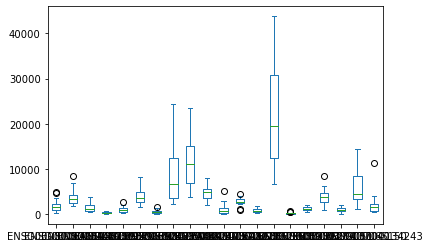

In [35]:
df_expression.loc[:,df_expression.columns[:20]].plot(kind='box')

In [45]:
from troppo.omics.readers.generic import TabularReader
from troppo.methods_wrappers import ReconstructionWrapper
from numpy import linspace
from cobamp.gpr.core import GPR_GENE_RE
import re
patt = re.compile('__COBAMPGPRDOT__[0-9]{1}')
replace_alt_transcripts = lambda x: patt.sub('',x)
threshold = 15
def integration_fx(data_map):
    return [[k for k, v in data_map.get_scores().items() if
             (v is not None and v > threshold) or k in ['biomass']]]

In [37]:
tab_rdr = TabularReader(path_or_df=df_expression, nomenclature='ensembl_id', omics_type='proteomics', cache_df=True)
ocs = tab_rdr.to_containers()

In [38]:
samples = ['Caov3', 'COV362', 'TYK-nu']

In [39]:
oc_sample = [oc for oc in ocs if oc.get_Condition() in samples]

In [40]:
oc_sample = []
for container in ocs:
    if container.get_Condition() in samples:
        oc_sample.append(container)

In [41]:
for container in oc_sample:
    print(container.get_Condition())

Caov3
COV362
TYK-nu


In [46]:
rw = ReconstructionWrapper(model, ttg_ratio=9999, gpr_gene_parse_function = replace_alt_transcripts)

TypeError: The `model` instance is not currently supported by cobamp. Currently available readers are: ['cobra.core.model', 'framed.model.cbmodel', 'cobamp.core.models', 'numpy']

In [43]:
pip install cobamp

Note: you may need to restart the kernel to use updated packages.


In [44]:
import cobamp

# load model using cobrapy to see if it's mewpy which is the problem.

In [52]:
cobra.Configuration.solver = 'cplex'
cobra.Configuration.solver

'cplex'

In [53]:
model = read_sbml_model('Human-GEM-annotated.xml')
model

Name,HumanGEM
Memory address,0x0137debe20
Number of metabolites,8400
Number of reactions,13096
Number of groups,143
Objective expression,1.0*biomass_human - 1.0*biomass_human_reverse_fb2f2
Compartments,"Cytosol, Extracellular, Lysosome, Endoplasmic reticulum, Mitochondria, Peroxisome, Golgi apparatus, Nucleus, Inner mitochondria"


In [58]:
model_matlab = cobra.io.load_matlab_model("HumanGEMmat")
model_matlab

ValueError: Names cannot contain whitespace characters. "m00003r[endoplasmic reticulum]" contains whitespace character " ".

In [66]:
from cobra.io import load_matlab_model, save_matlab_model, read_sbml_model, write_sbml_model
import logging
from pathlib import Path

model_matlab = cobra.io.load_matlab_model("July August modelling/Human-GEM.mat")
model_matlab

FileNotFoundError: [Errno 2] No such file or directory: 'July August modelling/Human-GEM.mat'

In [67]:
rw = ReconstructionWrapper(model, ttg_ratio=9999, gpr_gene_parse_function = replace_alt_transcripts)

/opt/anaconda3/envs/sklearn-env/lib/python3.9/site-packages/cobamp/gpr/core.py:41: UserWarning: Could not normalize this rule: _ENSG00000147576 or _ENSG00000172955 or _ENSG00000180011 or _ENSG00000187758 or _ENSG00000196344 or _ENSG00000196616 or _ENSG00000197894 or _ENSG00000198099 or _ENSG00000248144
  warnings.warn('Could not normalize this rule: ' + rule)
/opt/anaconda3/envs/sklearn-env/lib/python3.9/site-packages/cobamp/gpr/core.py:41: UserWarning: Could not normalize this rule: _ENSG00000117448
  warnings.warn('Could not normalize this rule: ' + rule)
/opt/anaconda3/envs/sklearn-env/lib/python3.9/site-packages/cobamp/gpr/core.py:41: UserWarning: Could not normalize this rule: _ENSG00000131069
  warnings.warn('Could not normalize this rule: ' + rule)
/opt/anaconda3/envs/sklearn-env/lib/python3.9/site-packages/cobamp/gpr/core.py:41: UserWarning: Could not normalize this rule: _ENSG00000111058 or _ENSG00000154930
  warnings.warn('Could not normalize this rule: ' + rule)
/opt/anacond

In [72]:
reactions = model.reactions
reaction_one = reactions[0]
reaction_one.gene_reaction_rule

'ENSG00000147576 or ENSG00000172955 or ENSG00000180011 or ENSG00000187758 or ENSG00000196344 or ENSG00000196616 or ENSG00000197894 or ENSG00000198099 or ENSG00000248144'

# trying code on workshop model to spot differences

In [73]:
model_workshop = cobra.io.load_matlab_model("redHUMAN_recon2_smin.mat")
model_workshop

Name,redHUMAN_recon2_smin_02Sep2019_135437
Memory address,0x0141032280
Number of metabolites,469
Number of reactions,1396
Number of groups,0
Objective expression,1.0*biomass - 1.0*biomass_reverse_01e59
Compartments,"c, m, x, e, r, l, n"


In [77]:
reactions_workshop = model_workshop.reactions
reaction_one_workshop = reactions_workshop[0]
reaction_one_workshop.gene_reaction_rule

'(10993.1)'

In [78]:
for r in reactions_workshop:
    print(r.gene_reaction_rule)

(10993.1)
(89874.1)

(57835.3) or (8671.1) or (57835.2) or (57835.1) or (57835.4)
(4967.1) and (1738.1 and 8050.1) and (1743.1) or (4967.2) and (1738.1 and 8050.1) and (1743.1)
89874.1
3242.1

(18.1) or (18.2)
(18.1) or (18.2)
23498.1

(51166.1) or (883.1) or (51166.2)


(10165.1) or (8604.1)
(2805.1)
(2806.1)




(2348.5) or (2348.3) or (2348.1) or (2348.6) or (2352.1) or (2348.4) or (2348.2)
(6573.1) or (6573.2)
65985.1
(8639.1)


(51166.1) or (51166.2)
(18.1) or (18.2)
(223.1)
(206358.1)
(6529.1) or (6538.1) or (6540.1) or (6539.1)
(38.1) or (3032.1) or (10449.1)
39.1
(6566.1) or (9194.1)
(6566.1)
(6566.1) or (9123.1) or (9194.1)
(6566.1)
(47.1) or (47.2)
(36.1) or (34.1)
(34.1) or (27034.1)
134526.1
(3658.1) or (48.1)
(50.1) or (48.1)
(65985.1) or (55902.2) or (55902.1)
84532.1


(1571.1)
(1571.1)
(112611.1) or (98.1) or (97.2) or (97.1)

3177.1
(122481.1) or (203.1) or (26289.1) or (26289.2) or (204.1)
(205.3) or (205.1) or (204.1) or (204.3) or (204.2) or (205.2)
(26289.1) or (26

In [79]:
for r in reactions:
    print(r.gene_reaction_rule)

ENSG00000147576 or ENSG00000172955 or ENSG00000180011 or ENSG00000187758 or ENSG00000196344 or ENSG00000196616 or ENSG00000197894 or ENSG00000198099 or ENSG00000248144
ENSG00000117448
ENSG00000131069
ENSG00000111058 or ENSG00000154930
ENSG00000131069
ENSG00000131069
ENSG00000091140 and ENSG00000110435 and ENSG00000131828 and ENSG00000150768 and ENSG00000163114 and ENSG00000168291
ENSG00000111716 or ENSG00000134333 or ENSG00000151116 or ENSG00000166796 or ENSG00000166800 or ENSG00000171989
ENSG00000111716 or ENSG00000134333 or ENSG00000151116 or ENSG00000166796 or ENSG00000166800 or ENSG00000171989
ENSG00000006534 or ENSG00000108602 or ENSG00000132746 or ENSG00000184254
ENSG00000072210 or ENSG00000111275 or ENSG00000137124 or ENSG00000143149 or ENSG00000164904
ENSG00000067057 or ENSG00000141959 or ENSG00000152556
ENSG00000067057 or ENSG00000141959 or ENSG00000152556 or ENSG00000160226
ENSG00000109107 or ENSG00000136872 or ENSG00000149925 or ENSG00000285043
ENSG00000067225 or ENSG0000012

In [80]:
df_expression_workshop = pd.read_csv('data/CCLE_breast_cancer_expression.csv', index_col=0)
df_expression_workshop

,10165,6514,51557,47,6563,3421,6898,760,9123,501,...,594,4728,8781,39,2639,5160,4724,7352,3945,2876
DepMap_ID,,,,,,,,,,,,,,,,,,,,,
ACH-000017,5.380591,0.000000,0.056584,7.664483,0.111031,6.116240,0.014355,0.124328,7.890021,5.376082,...,2.948601,6.971199,0.000000,4.661065,4.419539,7.676380,5.776630,0.863938,8.376386,0.594549
ACH-000019,4.358256,0.000000,0.014355,6.361944,0.097611,6.730776,0.056584,4.918863,4.339137,5.962086,...,3.161888,7.469886,0.000000,5.056584,5.475085,7.593951,6.753952,0.678072,1.550901,0.650765
ACH-000028,4.808385,0.000000,0.000000,6.352441,0.070389,6.647171,0.214125,3.030336,3.320485,6.005625,...,2.869871,7.241173,0.000000,5.128458,4.892877,7.466546,6.880808,0.895303,2.014355,0.748461
ACH-000044,3.555816,0.000000,0.000000,5.169123,2.505891,5.816856,1.220330,3.313246,3.758090,5.824513,...,3.815575,6.265474,0.000000,5.954196,5.322649,6.504144,7.633431,3.558268,1.744161,7.530055
ACH-000097,4.288359,0.000000,0.014355,6.190417,0.137504,5.934517,0.056584,3.266037,5.743892,5.653920,...,3.385431,8.584399,0.000000,5.744161,4.541019,7.117487,7.413120,0.765535,4.484138,2.901108
ACH-000111,4.495695,0.028569,0.014355,7.096241,0.344828,6.041550,0.641546,1.490570,1.275007,6.902074,...,2.568032,7.171327,0.000000,6.103078,5.224581,6.814038,5.564378,1.871844,10.299208,1.356144
ACH-000117,4.098453,0.000000,0.028569,5.948601,0.250962,6.443607,0.056584,0.485427,5.809672,6.854993,...,2.606442,6.516330,0.000000,3.618239,3.547203,7.883376,6.534342,1.378512,2.835924,7.438875
ACH-000147,3.982765,0.014355,0.014355,7.229300,0.163499,5.130107,0.150560,0.124328,5.245267,6.384913,...,3.316146,7.498011,0.000000,5.372604,4.848998,7.744565,6.799217,0.855990,1.691534,0.555816
ACH-000148,2.629939,0.028569,0.000000,7.282440,0.056584,5.712321,0.000000,0.070389,6.070175,6.654493,...,3.260026,6.973382,0.000000,6.332171,4.924100,7.382235,7.218200,0.622930,8.509379,7.523797


In [82]:
df_expression_workshop.loc[:,['10165','6514', '51557']].mean()

10165    4.292774
6514     0.007298
51557    0.081124
dtype: float64

<AxesSubplot:>

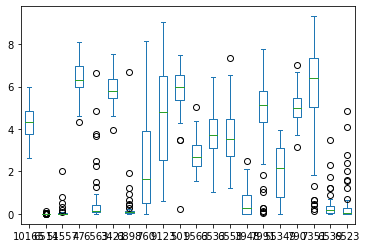

In [83]:
df_expression_workshop.loc[:,df_expression_workshop.columns[:20]].plot(kind='box')

In [84]:
from troppo.omics.readers.generic import TabularReader
from troppo.methods_wrappers import ReconstructionWrapper
from numpy import linspace
from cobamp.gpr.core import GPR_GENE_RE
import re
patt = re.compile('__COBAMPGPRDOT__[0-9]{1}')
replace_alt_transcripts = lambda x: patt.sub('',x)
threshold = 15
def integration_fx(data_map):
    return [[k for k, v in data_map.get_scores().items() if
             (v is not None and v > threshold) or k in ['biomass']]]

In [85]:
tab_rdr = TabularReader(path_or_df=df_expression_workshop, nomenclature='entrez_id', omics_type='transcriptomics', cache_df=True)
ocs = tab_rdr.to_containers()

In [86]:
samples = ['ACH-000019', 'ACH-000028', 'ACH-000349']

In [87]:
oc_sample = [oc for oc in ocs if oc.get_Condition() in samples]

In [88]:
oc_sample = []
for container in ocs:
    if container.get_Condition() in samples:
        oc_sample.append(container)

In [89]:
for container in oc_sample:
    print(container.get_Condition())

ACH-000019
ACH-000028
ACH-000349


In [90]:
rw = ReconstructionWrapper(model_workshop, ttg_ratio=9999, gpr_gene_parse_function = replace_alt_transcripts)

/opt/anaconda3/envs/sklearn-env/lib/python3.9/site-packages/cobamp/gpr/core.py:41: UserWarning: Could not normalize this rule: (_10993)
  warnings.warn('Could not normalize this rule: ' + rule)
/opt/anaconda3/envs/sklearn-env/lib/python3.9/site-packages/cobamp/gpr/core.py:41: UserWarning: Could not normalize this rule: (_89874)
  warnings.warn('Could not normalize this rule: ' + rule)
/opt/anaconda3/envs/sklearn-env/lib/python3.9/site-packages/cobamp/gpr/core.py:41: UserWarning: Could not normalize this rule: (_57835) or (_8671) or (_57835) or (_57835) or (_57835)
  warnings.warn('Could not normalize this rule: ' + rule)
/opt/anaconda3/envs/sklearn-env/lib/python3.9/site-packages/cobamp/gpr/core.py:41: UserWarning: Could not normalize this rule: (_4967) and (_1738 and _8050) and (_1743) or (_4967) and (_1738 and _8050) and (_1743)
  warnings.warn('Could not normalize this rule: ' + rule)
/opt/anaconda3/envs/sklearn-env/lib/python3.9/site-packages/cobamp/gpr/core.py:41: UserWarning: Cou

In [91]:
model_workshop.genes

[<Gene 10993.1 at 0x25a76a4c0>,
 <Gene 89874.1 at 0x25a76a4f0>,
 <Gene 57835.2 at 0x25a76a610>,
 <Gene 57835.3 at 0x25a76aa30>,
 <Gene 57835.1 at 0x25a76a8b0>,
 <Gene 57835.4 at 0x25a76a8e0>,
 <Gene 8671.1 at 0x25a76a700>,
 <Gene 4967.2 at 0x25a76ab20>,
 <Gene 8050.1 at 0x25a76ad30>,
 <Gene 1743.1 at 0x25a76a790>,
 <Gene 1738.1 at 0x25a76a7c0>,
 <Gene 4967.1 at 0x25a76a9d0>,
 <Gene 3242.1 at 0x25a76ac10>,
 <Gene 18.1 at 0x25a76a520>,
 <Gene 18.2 at 0x25a76a5e0>,
 <Gene 23498.1 at 0x25a76ac40>,
 <Gene 883.1 at 0x25a76aa00>,
 <Gene 51166.1 at 0x25a76a820>,
 <Gene 51166.2 at 0x25a76a970>,
 <Gene 10165.1 at 0x25a76aac0>,
 <Gene 8604.1 at 0x25a76a940>,
 <Gene 2805.1 at 0x25a76a880>,
 <Gene 2806.1 at 0x25a76a850>,
 <Gene 2348.1 at 0x25a76ae20>,
 <Gene 2348.6 at 0x25a76aa60>,
 <Gene 2348.4 at 0x25a76d460>,
 <Gene 2348.5 at 0x25a76d100>,
 <Gene 2352.1 at 0x25a76af10>,
 <Gene 2348.2 at 0x25a76d130>,
 <Gene 2348.3 at 0x25a76ad60>,
 <Gene 6573.2 at 0x25a76aee0>,
 <Gene 6573.1 at 0x25a76af70>,
 <G

In [98]:
for r in oc_sample:
    print(r.get_Condition())

ACH-000019
ACH-000028
ACH-000349


In [99]:
r_models = {}
for sample in oc_sample:
    r_models[sample.get_Condition()] = rw.run_from_omics(omics_data = sample, algorithm = 'fastcore', and_or_funcs=(min,sum), integration_strategy=('custom', [integration_fx]), solver='CPLEX')

J size27
[  74   92   94  101  102  279  303  314  315  332  347  350  364  375
  389  401  427  456  463  468  470  478  485  504  534 1271 1336]
before LP7
LP7
nan
Warning, Solution is not optimal
done LP7


Exception: Inconsistent irreversible core reactions 
	Impossible to build model

In [100]:
sim_fba = model.optimize()

SolverError: CPLEX Error  1016: Community Edition. Problem size limits exceeded. Purchase at http://ibm.biz/error1016.